# Academic Success Dataset, классификация
#### [Source](https://www.kaggle.com/competitions/playground-series-s4e6)

### Описание
Цель - спрогнозировать академический риск студентов в высших учебных заведениях.
Описание набора данных находится [здесь](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

###  Загрузка данных проекта в среду разработки

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

train = pd.read_csv('../dataset/train.csv', index_col='id')
test = pd.read_csv('../dataset/test.csv', index_col='id')
print(train)

       Marital status  Application mode  Application order  Course  \
id                                                                   
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
id                          

###  Проверка датасета данных на пропуски

In [11]:
# Проверка на пропуски
train.isna().sum().sort_values(ascending=False)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

###  Проверка датасета данных на дубликаты

In [12]:
# Проверяем, есть ли дубликаты
train.duplicated().sum()

np.int64(0)

###  Взгляд на общую информацию по датасету

In [13]:
# смотрим общую инфу по датасету
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

### Анализ целевой переменной

In [14]:
print(train['Target'].value_counts())

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


В целевой переменной есть 3 класса. Классы несбалансированы. Целевая переменная, очевидно, категориальная, номинальный порядок.

###  Определяем категориальные и числовые признаки

In [15]:
# Пытаемся определить, сколько категориальных и числовых признаков у нас есть.
# Подобрал поиском и анализом примерную величину уникальных значений столбцов, которая позволяет провести эту границу
cat_cols = [col for col in train.columns if train[col].nunique() <= 19]

num_cols = [col for col in train.columns if train[col].nunique() >= 20]

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in cat_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце категориальных признаков'{col}': {unique_values}")

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in num_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце числовых признаков'{col}': {unique_values}")

Уникальные значения в столбце категориальных признаков'Marital status': [1 2 4 3 5 6]
Уникальные значения в столбце категориальных признаков'Application order': [1 2 3 6 4 5 0 9]
Уникальные значения в столбце категориальных признаков'Course': [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Уникальные значения в столбце категориальных признаков'Daytime/evening attendance': [1 0]
Уникальные значения в столбце категориальных признаков'Nacionality': [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
Уникальные значения в столбце категориальных признаков'Displaced': [0 1]
Уникальные значения в столбце категориальных признаков'Educational special needs': [0 1]
Уникальные значения в столбце категориальных признаков'Debtor': [0 1]
Уникальные значения в столбце категориальных признаков'Tuition fees up to date': [1 0]
Уникальные значения в столбце категориальных признаков'Gender': [0 1]
Уникальные значения в столбце категор

###  Определяем категориальные и числовые признаки 2
Количество уникальных значений не оказалось тем показателем, который бы указывал однозначено на то, категориальный ли это признак или числовой.
Семантика тоже оказалась немаловажным признаком.

Поэтому на основании информации, указанной в источнике данных, определили так:

In [16]:
import pandas as pd

# Категориальные признаки
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]
# числовые признаки
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]

print("Categorical Columns:")
for column in categorical_columns:
    print(column)

print("\n")

print("Numerical Columns:")
for column in numerical_columns:
    print(column)


Categorical Columns:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


Numerical Columns:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


### Визуализация данных
Построим графики распределения данных для каждого признака

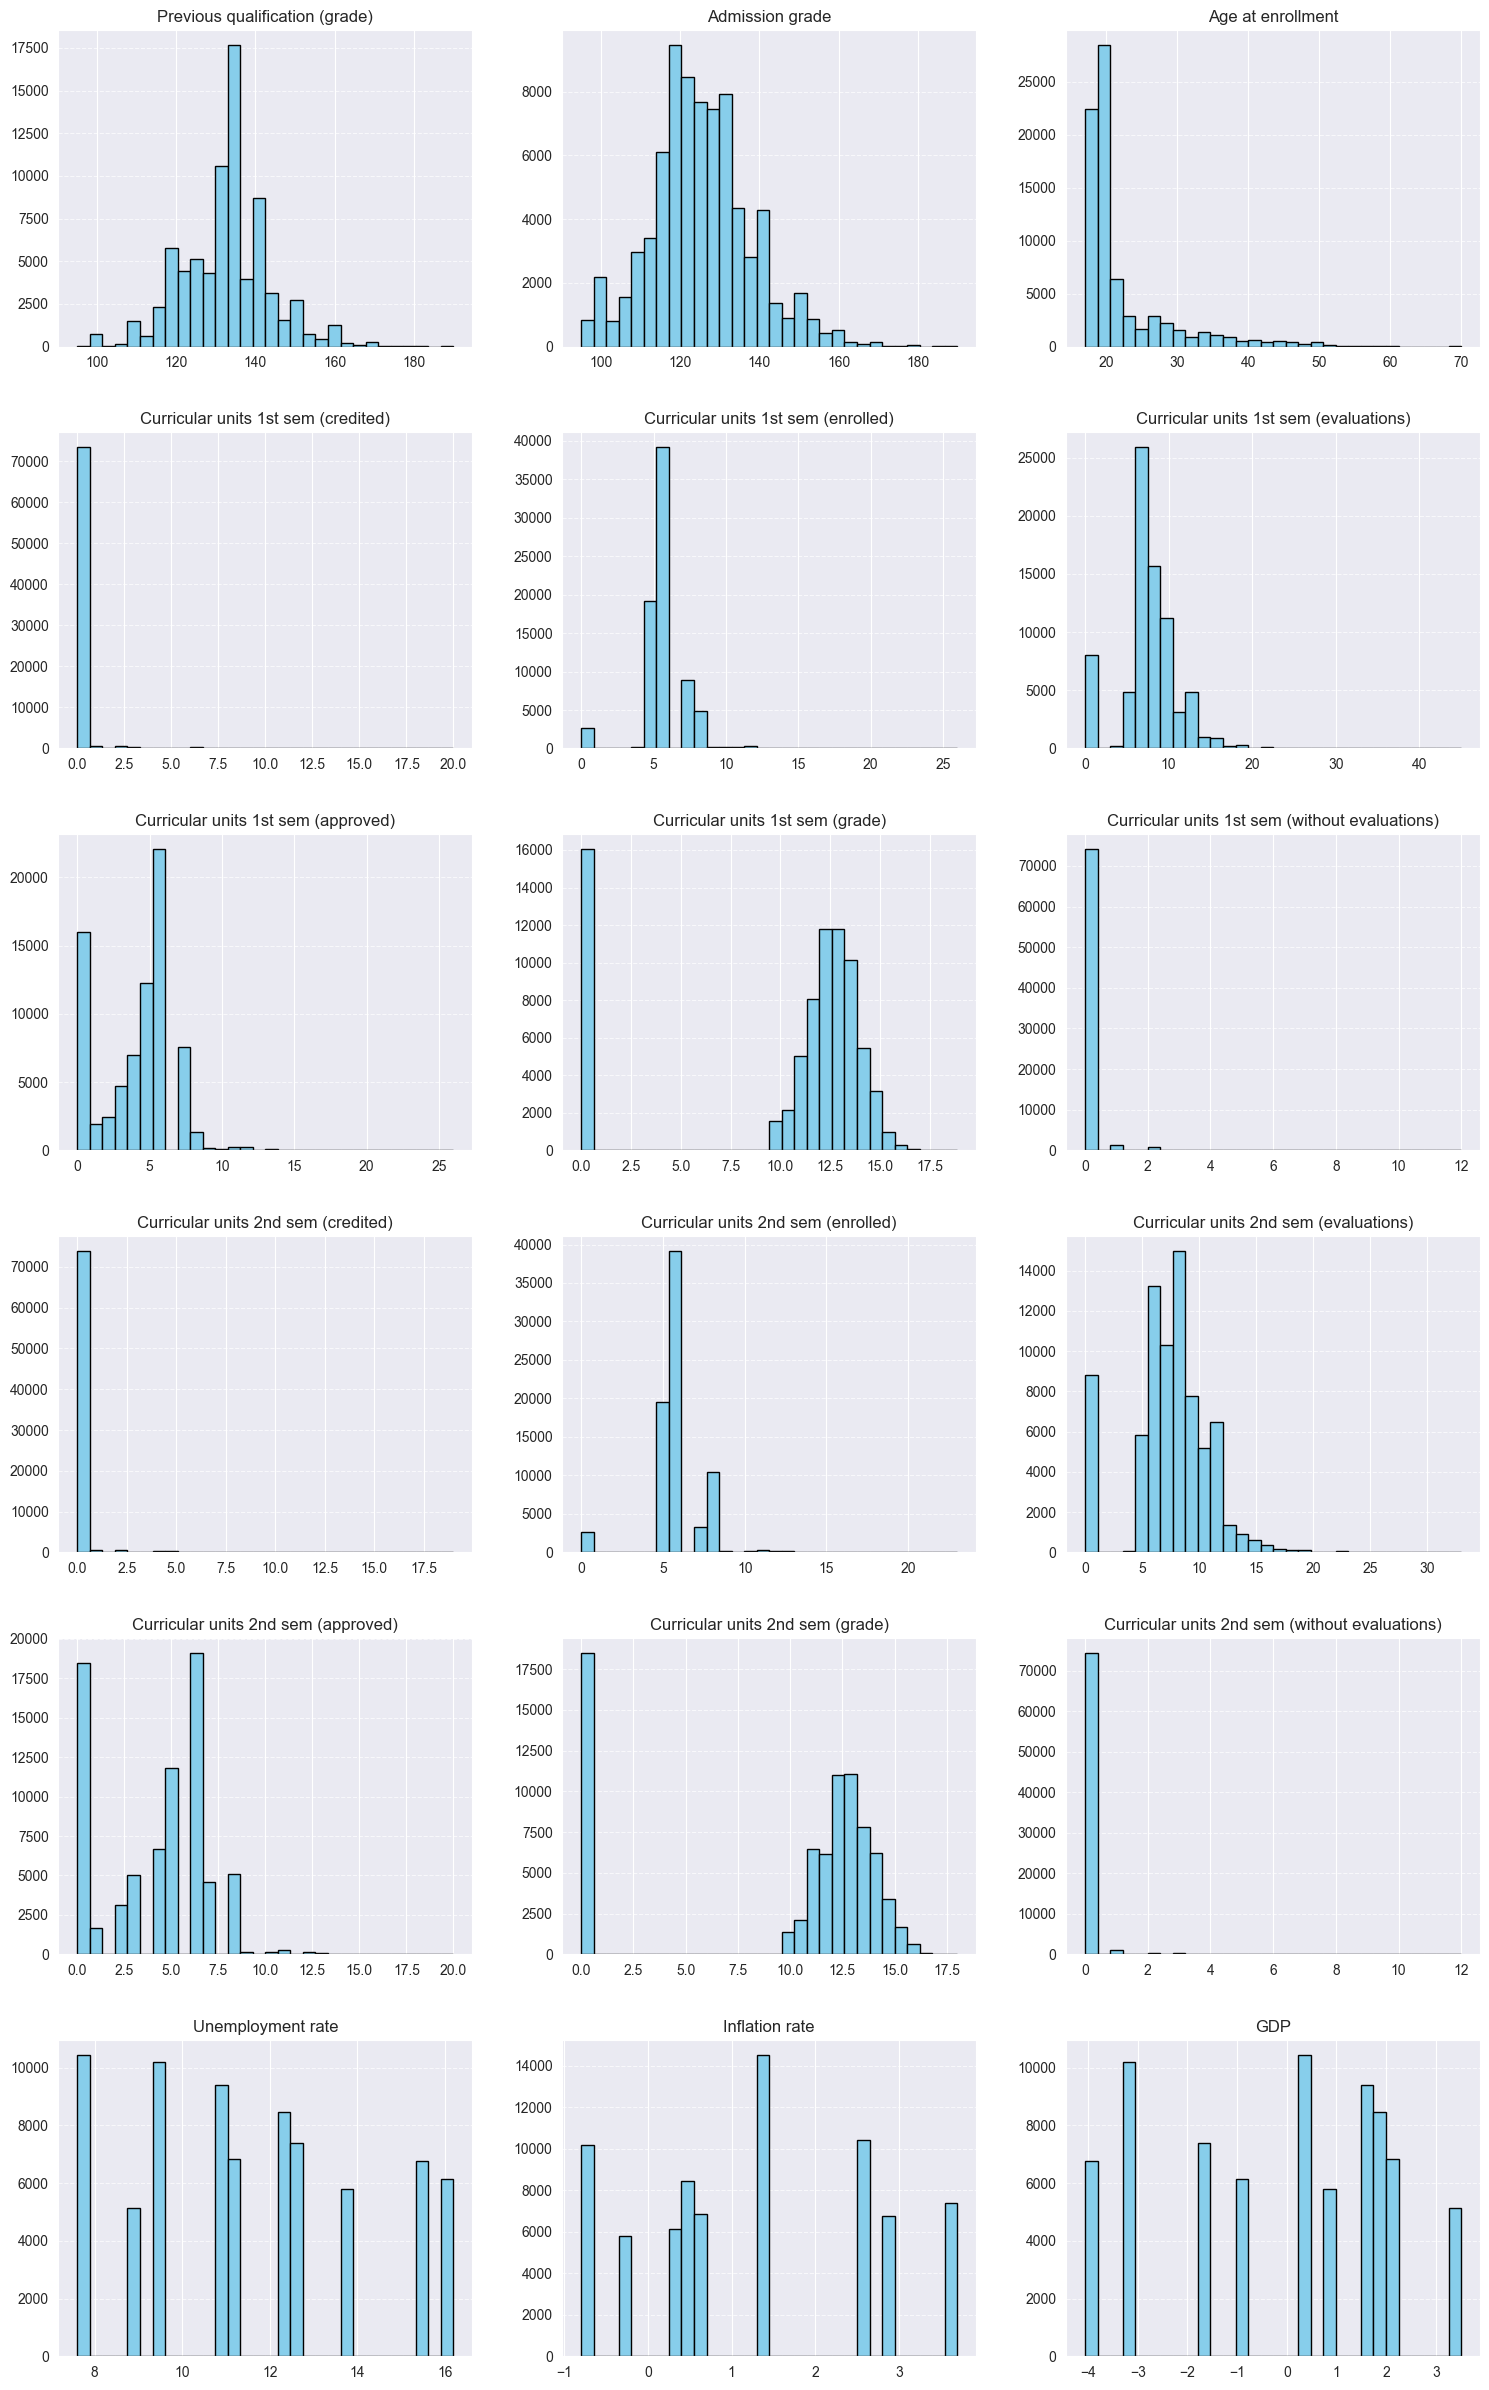

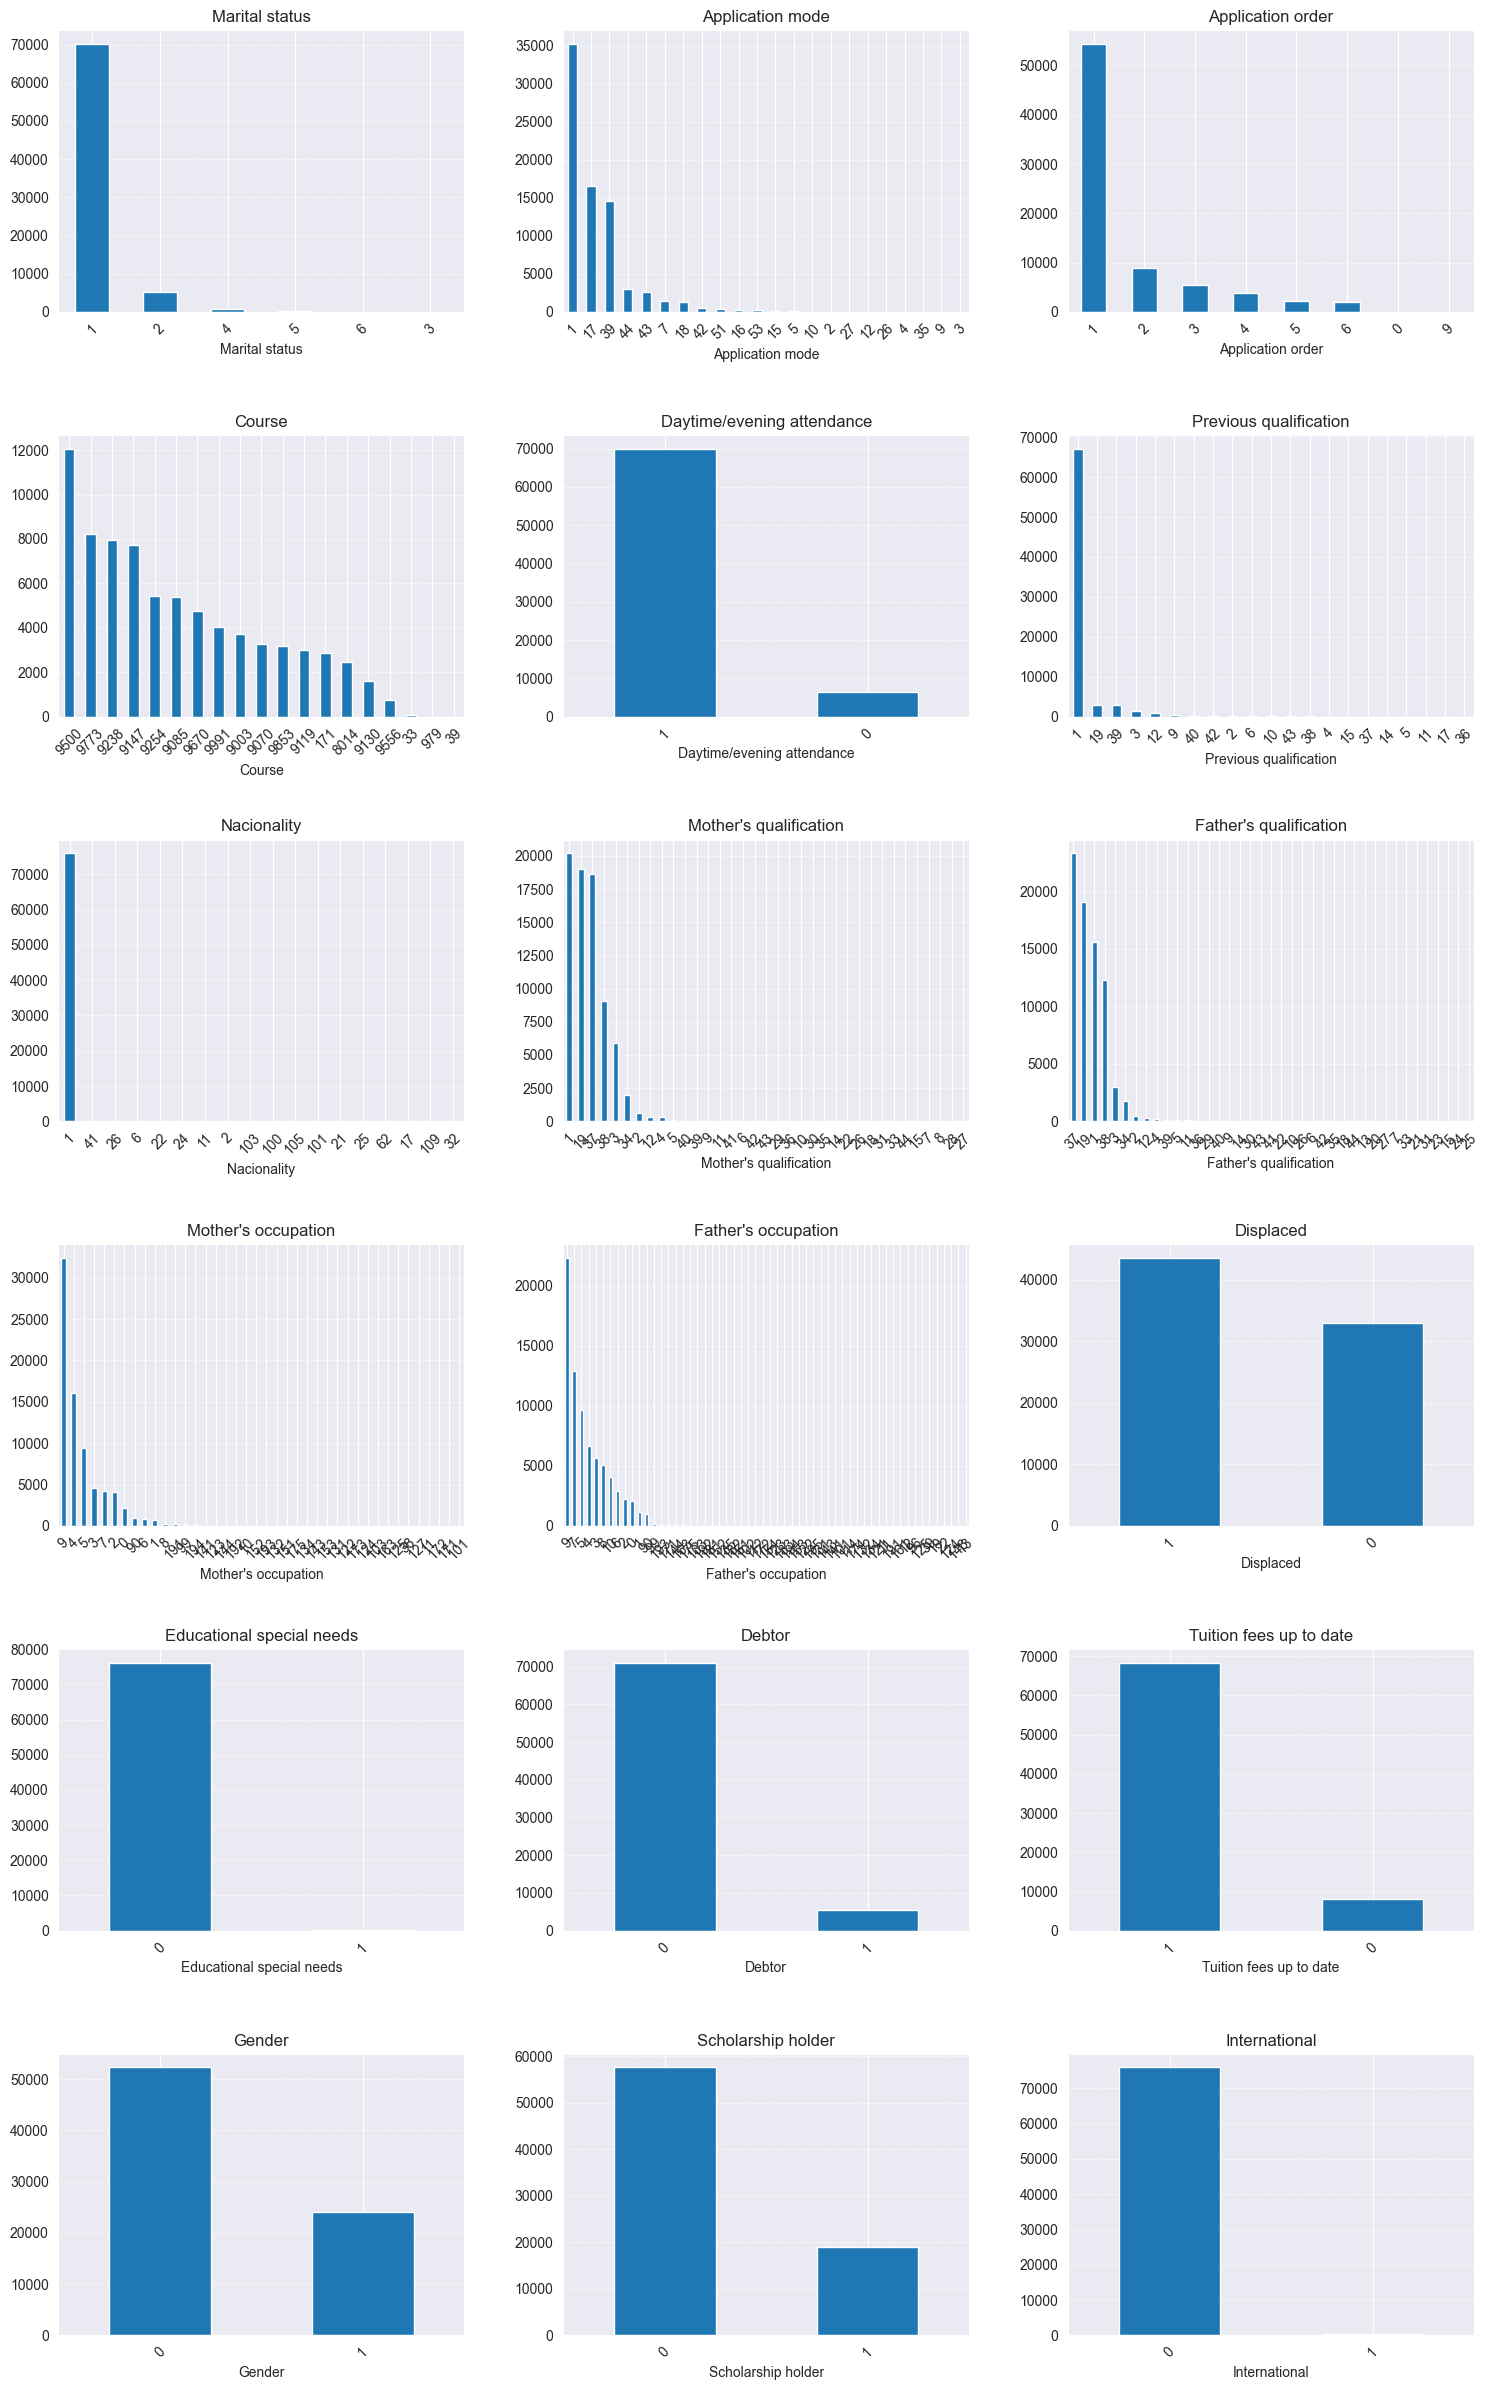

In [17]:
def count_plot_cols_and_rows(features: list, cols=3) -> tuple:
    """
    Function to calculate the number of rows and columns required for plotting the features on a grid in one figure.
    @param cols: Desired amount of plot
    @param features: List of features
    @return: Tuple with number of rows and columns
    """
    num_features = len(features)
    # num / col - counts requires amount of rows for num features. + cols - 1 add extra row if num % col != 0, for example  7 // 3 == 2, 2 * 3 = 6, one plot will be missed. -1 to not add extra row if num % col == 0
    rows = (num_features + cols - 1) // cols
    return rows, cols


def plot_numeric_categorical_features(df: pd.DataFrame, categorical_features: list, numeric_features: list):
    """
    Function to plot the distribution of numerical features using histograms and categorical features using bar plots.
    @param df: Pandas DataFrame
    @param categorical_features: List of categorical features
    @param numeric_features: List of numerical features
    """

    rows, cols = count_plot_cols_and_rows(numeric_features)
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()
    for idx, feature in enumerate(numeric_features):
        ax = axes[idx]
        ax.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
        ax.set_title(feature)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=1.08, h_pad=3, w_pad=3)
    #plt.savefig('plots/numeric_features.png', dpi=300)
    plt.show()

    rows, cols = count_plot_cols_and_rows(categorical_features)
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()
    for idx, feature in enumerate(categorical_features):
        ax = axes[idx]
        df[feature].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(feature)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=1.08, h_pad=3, w_pad=3)
    #plt.savefig('plots/categorical_features.png', dpi=300)
    plt.show()


plot_numeric_categorical_features(train, categorical_columns, numerical_columns)

На основе графиков можно увидеть несколько признаков со значительным дисбалансом значений, посчитаем и сохраним дисбаланс для этих признаков

In [18]:
potentially_disbalanced_features = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (without evaluations)",
    "Marital status",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "International"
]
disbalanced_features_and_most_frequent_percent = [
    (feature, float(train[feature].value_counts().max() / len(train[feature]) * 100)) for feature in potentially_disbalanced_features
]

disbalanced_features_and_most_frequent_percent = sorted(disbalanced_features_and_most_frequent_percent, key=lambda x: x[1], reverse=True)
print(tabulate(disbalanced_features_and_most_frequent_percent, headers=["Category", "Percentage"], tablefmt="grid"))

+------------------------------------------------+--------------+
| Category                                       |   Percentage |
+================================================+==============+
| Nacionality                                    |      99.34   |
+------------------------------------------------+--------------+
| International                                  |      99.3374 |
+------------------------------------------------+--------------+
| Curricular units 2nd sem (without evaluations) |      97.1954 |
+------------------------------------------------+--------------+
| Curricular units 1st sem (without evaluations) |      96.7994 |
+------------------------------------------------+--------------+
| Curricular units 2nd sem (credited)            |      96.4597 |
+------------------------------------------------+--------------+
| Curricular units 1st sem (credited)            |      95.963  |
+------------------------------------------------+--------------+
| Marital 

### Корреляция признаков
Построим таблицу корреляции признаков

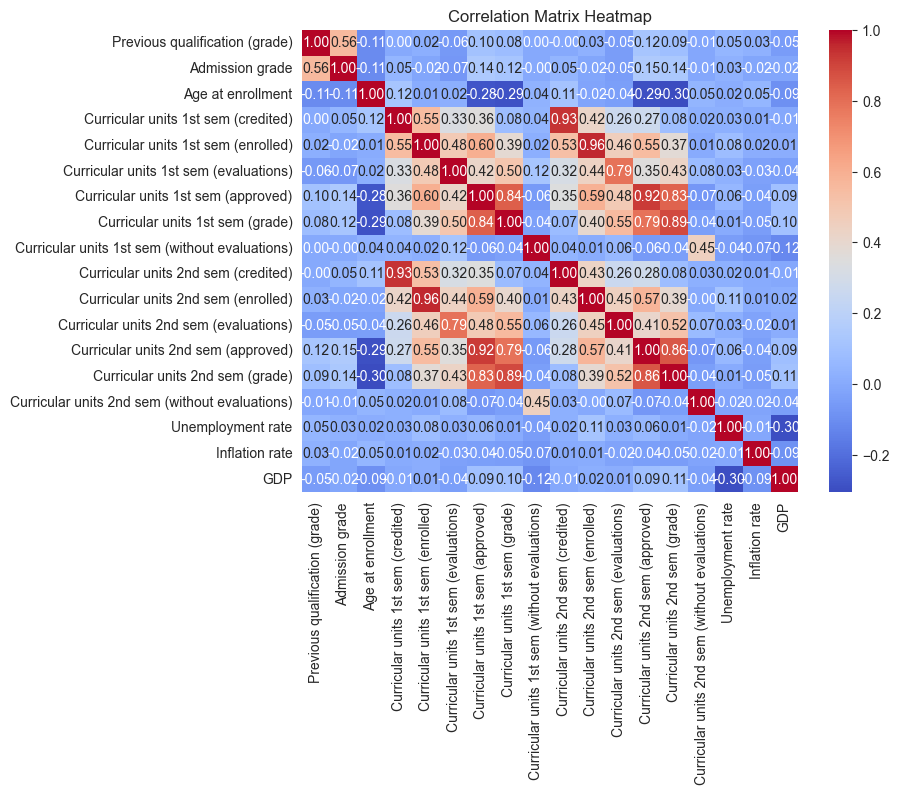

In [19]:
corr_matrix = train[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

По графику явно наблюдается корреляция между значениями, связанными с curricular units

### Прочее по анализу данных

#### 1) Qualification features
Порядок следования номеров в столбцах/признаках Previous qualification, Mother's qualification, Father's qualification не отражает, какой уровень образования выше или ниже, это следует исправить

In [20]:
previous_qualification_mapping = {
    5: 0,   # Doctorate
    43: 1,  # Master's (2nd cycle)
    4: 1,   # Master's
    40: 2,  # Degree (1st cycle)
    2: 3,   # Bachelor's degree
    39: 4,  # Technological specialization
    42: 5,  # Professional higher technical course
    6: 6,   # Frequency of higher education
    9: 7,   # 12th year not completed
    10: 8,  # 11th year not completed
    12: 9,  # Other - 11th year
    14: 10, # 10th year
    15: 11, # 10th year not completed
    19: 12, # Basic education 3rd cycle
    38: 13, # Basic education 2nd cycle
    1: 14   # Secondary education
}
mother_qualification_mapping = {
    44: 0,  # Doctorate (3rd Cycle)
    5: 0,   # Doctorate
    43: 1,  # Master's (2nd Cycle)
    4: 1,   # Master's
    40: 2,  # Degree (1st Cycle)
    3: 2,   # Degree
    2: 3,   # Bachelor's
    39: 4,  # Technological specialization
    42: 5,  # Professional higher technical
    41: 6,  # Specialized higher studies
    6: 7,   # Frequency of higher education
    9: 8,   # 12th Year - Not Completed
    10: 9,  # 11th Year - Not Completed
    12: 10, # Other - 11th Year
    14: 11, # 10th Year
    29: 12, # 9th Year - Not Completed
    19: 13, # Basic Education 3rd Cycle
    18: 14, # General commerce course
    27: 15, # 2nd Cycle of General High School
    26: 16, # 7th Year of Schooling
    11: 16, # 7th Year (Old)
    38: 17, # Basic Education 2nd Cycle
    37: 18, # Basic Education 1st Cycle
    36: 19, # Can Read Without 4th Year
    35: 20, # Can't Read or Write
    34: 21  # Unknown
}
father_qualification_mapping = {
    44: 0,  # Doctorate (3rd Cycle)
    5: 0,   # Doctorate
    43: 1,  # Master's (2nd Cycle)
    4: 1,   # Master's
    40: 2,  # Degree (1st Cycle)
    3: 2,   # Degree
    2: 3,   # Bachelor's Degree
    39: 4,  # Technological Specialization Course
    42: 5,  # Professional Higher Technical Course
    41: 6,  # Specialized Higher Studies Course
    6: 7,   # Frequency of Higher Education
    9: 8,   # 12th Year of Schooling - Not Completed
    10: 9,  # 11th Year of Schooling - Not Completed
    12: 10, # Other - 11th Year of Schooling
    13: 11, # 2nd Year Complementary High School Course
    20: 11, # Complementary High School Course
    14: 12, # 10th Year of Schooling
    25: 13, # Complementary High School Course - Not Concluded
    29: 14, # 9th Year of Schooling - Not Completed
    19: 15, # Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    18: 16, # General Commerce Course
    27: 17, # 2nd Cycle of General High School
    26: 18, # 7th Year of Schooling
    11: 18, # 7th Year (Old System)
    30: 19, # 8th Year of Schooling
    38: 20, # Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
    37: 21, # Basic Education 1st Cycle (4th/5th Year) or Equiv.
    31: 22, # General Course of Administration and Commerce
    33: 23, # Supplementary Accounting and Administration
    36: 24, # Can Read Without Having 4th Year
    35: 25, # Can't Read or Write
    34: 26  # Unknown
}

train['Previous qualification'] = train['Previous qualification'].map(previous_qualification_mapping)
train["Mother's qualification"] = train["Mother's qualification"].map(mother_qualification_mapping)
train["Father's qualification"] = train["Father's qualification"].map(father_qualification_mapping)

#### 2) Missing encoded values
Для столбцов Mother's occupation и Father's occupation отсутствие данных закодировано как 99 ("blank"), для Mother's qualification и Father's qualification представлено как значение "Unknown" под кодами 21 и 26 соответственно. Рассмотрим частоту встречаемости этих кодов для каждого признака.

In [21]:
def calculate_value_frequency_percent(df: pd.DataFrame, feature_column: str, value) -> float:
    """
    Function to calculate the frequency of a specific value in a feature.

    @param df: Pandas DataFrame
    @param feature_column: Feature name
    @param value: Value to calculate the frequency

    @raise ValueError: If the value is not found in the feature

    @return: Frequency of the value in the feature by percentage
    """
    frequency = df[feature_column].value_counts().get(value)
    if frequency is None:
        raise ValueError(f"Value {value} not found in the feature {feature_column}")
    value_percentage = (frequency / len(df[feature_column])) * 100
    return value_percentage

features_with_missing_values = {
    "Mother's occupation": 99,
    "Father's occupation": 99,
    "Mother's qualification": 21,
    "Father's qualification": 26
}

features_and_missing_percent = [
    (feature, missing_code, calculate_value_frequency_percent(train, feature, missing_code)) for feature, missing_code in features_with_missing_values.items()
]
print(tabulate(features_and_missing_percent, headers=["Feature with missing values", "Missing value code", "Percentage of missing values"], tablefmt="grid"))


+-------------------------------+----------------------+--------------------------------+
| Feature with missing values   |   Missing value code |   Percentage of missing values |
+===============================+======================+================================+
| Mother's occupation           |                   99 |                       0.18035  |
+-------------------------------+----------------------+--------------------------------+
| Father's occupation           |                   99 |                       0.196032 |
+-------------------------------+----------------------+--------------------------------+
| Mother's qualification        |                   21 |                       2.60462  |
+-------------------------------+----------------------+--------------------------------+
| Father's qualification        |                   26 |                       2.33932  |
+-------------------------------+----------------------+--------------------------------+


Процент кодов об отсутствии данных составляет менее 0.2% для occupation признаков и менее 3% для qualification признаков. Также эти отсутствующие данные именно закодированы, а не представлены в виде NaN, поэтому их можно оставить без изменений.

#### 3) Feature's functional dependence
На основании описания данных кажется, что признак Curricular units * sem (enrolled) может быть вычислен путем сложения Curricular units * sem (evaluations) и Curricular units * sem (without evaluations). Проверим это.

In [22]:
enrolled_1st_sem_differences = train['Curricular units 1st sem (enrolled)'] - (train['Curricular units 1st sem (evaluations)'] + train['Curricular units 1st sem (without evaluations)'])
enrolled_2nd_sem_differences = train['Curricular units 2nd sem (enrolled)'] - (train['Curricular units 2nd sem (evaluations)'] + train['Curricular units 2nd sem (without evaluations)'])

enrolled_differences = {
    "Curricular units 1st sem (enrolled)": int(np.sum(enrolled_1st_sem_differences != 0)),
    "Curricular units 2nd sem (enrolled)": int(np.sum(enrolled_2nd_sem_differences != 0))
}
for feature, differences_amount in enrolled_differences.items():
    if differences_amount == 0:
        print(f"Признак {feature} можно вычислить как сумму двух других признаков.")
    else:
        print(f"Признак {feature} не является линейной комбинацией других признаков.")
        print(f"Количество несоответствий: {differences_amount}, процент несоответствий: ~{differences_amount / len(train) * 100:.2f}%\n\n")

Признак Curricular units 1st sem (enrolled) не является линейной комбинацией других признаков.
Количество несоответствий: 50054, процент несоответствий: ~65.41%


Признак Curricular units 2nd sem (enrolled) не является линейной комбинацией других признаков.
Количество несоответствий: 48847, процент несоответствий: ~63.84%




Гипотеза не подтвердилась

#### 4) Debtor and Tuition fees up to date
Кажется что признаки Debtor и Tuition fees up to date могут быть взаимосвязаны, а именно предположим, что студент либо должник, либо вовремя платит за обучение. Проверим это.

In [23]:
#train[['Debtor', 'Tuition fees up to date']].describe()

same_debt_and_tuition_fee_value = train[(train['Debtor'] == train['Tuition fees up to date'])]
if same_debt_and_tuition_fee_value.empty:
    print("Cтудент либо должник, либо вовремя платит за обучение.")
else:
    print(f"Количество одинаковых значений в 'Debtor' и 'Tuition fees up to date': {len(same_debt_and_tuition_fee_value)}, эти признаки не всегда обратны друг другу")


Количество одинаковых значений в 'Debtor' и 'Tuition fees up to date': 6664, эти признаки не всегда обратны друг другу


'Debtor' и 'Tuition fees up to date' не всегда обратны друг другу, поэтому наше предположение неверно.

###  Кодировка Target c использованием LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для кодирования уникальных значений
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])

# Находим уникальные значения и сортируем их по порядку
unique_values = sorted(zip(le.transform(le.classes_), le.classes_))

# Проверяем результат
print("Преобразованные значения 'Target':", train['Target'].unique())


Преобразованные значения 'Target': [2 0 1]


###  Применяем нормализацию к новому определенному списку числовых категорий numerical_columns

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Применяем нормализацию
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

# Проверяем результат
print(train.head())


    Marital status  Application mode  Application order  Course  \
id                                                                
0                1                 1                  1    9238   
1                1                17                  1    9238   
2                1                17                  2    9254   
3                1                 1                  3    9500   
4                1                 1                  2    9500   

    Daytime/evening attendance  Previous qualification  \
id                                                       
0                            1                    14.0   
1                            1                    14.0   
2                            1                    14.0   
3                            1                    14.0   
4                            1                    14.0   

    Previous qualification (grade)  Nacionality  Mother's qualification  \
id                                              

###  Feature engeneering. Два новых признака пока достаточно, это средняя величина зачтенных экзаменов за два семестра и отношение количества успешно завершенных курсов к общему количеству записанных курсов за оба семестра.

In [26]:
train["Curricular units approved_ratio"] = (
                                                   (train["Curricular units 1st sem (approved)"]) + (
                                               train["Curricular units 2nd sem (approved)"])
                                           ) / 2

train['Academic Performance Ratio'] = np.where(
    (train['Curricular units 1st sem (enrolled)'] + train['Curricular units 2nd sem (enrolled)']) == 0,
    0,  # Если знаменатель равен 0, устанавливаем значение 0
    (train['Curricular units 1st sem (approved)'] + train['Curricular units 2nd sem (approved)']) /
    (train['Curricular units 1st sem (enrolled)'] + train['Curricular units 2nd sem (enrolled)'])
)

# Проверяем добавленные признаки
print(train[["Curricular units approved_ratio", "Academic Performance Ratio"]].head(20))

    Curricular units approved_ratio  Academic Performance Ratio
id                                                             
0                          0.265385                    1.079592
1                          0.076923                    0.312925
2                          0.000000                    0.000000
3                          0.309615                    1.003523
4                          0.265385                    0.925364
5                          0.000000                    0.000000
6                          0.201923                    0.985714
7                          0.246154                    1.001361
8                          0.000000                    0.000000
9                          0.265385                    0.925364
10                         0.000000                    0.000000
11                         0.000000                    0.000000
12                         0.196154                    0.797959
13                         0.132692     

###  Применив RandomForestClassifier определяем часть важных признаков: как показал анализ, 20 признаков охватывают 90% от общей суммы "важности". Топ-15 давало, к примеру, 83%

Top 20 features based on importance:
                                   Feature  Importance
37              Academic Performance Ratio    0.142732
36         Curricular units approved_ratio    0.120249
30     Curricular units 2nd sem (approved)    0.091300
31        Curricular units 2nd sem (grade)    0.080015
24     Curricular units 1st sem (approved)    0.065627
25        Curricular units 1st sem (grade)    0.063643
12                         Admission grade    0.038242
29  Curricular units 2nd sem (evaluations)    0.035084
6           Previous qualification (grade)    0.031662
23  Curricular units 1st sem (evaluations)    0.031241
19                       Age at enrollment    0.027566
16                 Tuition fees up to date    0.025117
11                     Father's occupation    0.022442
3                                   Course    0.020226
8                   Mother's qualification    0.018191
9                   Father's qualification    0.018173
10                     Mothe

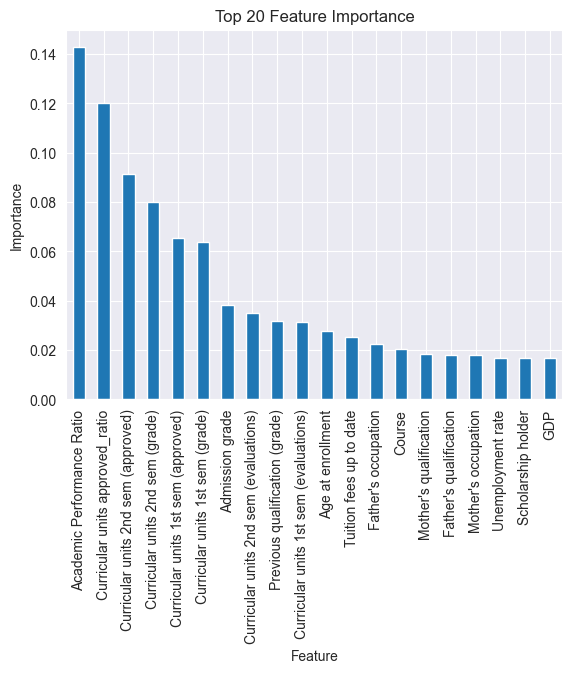

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#train = pd.read_csv('train.csv', index_col='id')

# Target' — это целевая переменная
X = train.drop('Target', axis=1)  # Все столбцы, кроме целевой переменной
y = train['Target']  # Целевая переменная

# Обучаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Получаем важность признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для визуализации
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем признаки по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Получаем топ-20 признаков
top_20_features = importance_df.head(20)

# Выводим топ-20 признаков
print("Top 20 features based on importance:")
print(top_20_features)

# Подсчитываем сумму важности топ-20 признаков
total_importance_top_20 = top_20_features['Importance'].sum()
print(f"\nСумма важности топ-20 признаков: {total_importance_top_20}")

# Визуализируем важность признаков
top_20_features.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()